In [1]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
# import seaborn as sns
from numpy import sort
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import random, math
from sklearn import metrics, preprocessing

In [2]:
data_path = "F:\\Users\\ivann_000\\AnacondaProjects\\MLBootcamp4\\data"
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)[0]
X = pd.DataFrame(preprocessing.minmax_scale(X))

In [3]:
for x in X:
    print(x, X[x].mean(), X[x].std())

0 0.38962998421112116 0.1931759431336491
1 0.38455518119990983 0.16366459778249984
2 0.3472295328988571 0.16257058611026415
3 0.28092083779304017 0.14268573193056014
4 0.4985152328009793 0.28821022455710127
5 0.39987144313658496 0.12709509417994674
6 0.3951776099661419 0.19152154821818648
7 0.33379367110168773 0.15488024918176518
8 0.2568830783908945 0.10955028515216778
9 0.36996842561591353 0.15114837039448425
10 0.1187038169552627 0.25360196981068367
11 0.2032490709208699 0.12921257600102357
12 0.29837141427323244 0.12430746727834907
13 0.3838152834474865 0.1331150239419088
14 0.12510103526198083 0.0331978175743017
15 0.19036413623192958 0.0892019362490903
16 0.4003051373020942 0.15054074301934253
17 0.46856848399993667 0.17518182313520692
18 0.45856732232957614 0.16835863626351147
19 0.4099632314201014 0.15227550198718362
20 0.4347724055053038 0.19568168485268503
21 0.3745473372117071 0.1710310948216778
22 0.4295179762249675 0.12953253011444865
23 0.43362194543000865 0.1563995425305

In [6]:
arr = []
corr = X.corr()
for i in corr:
    for j in corr:
        if ((corr[i][j] > 0.90) and (i!=j) and (i<j)):
            added = False
            for l, k in enumerate(arr):
                if not added:
                    if (i in k):
                        if j not in k:
                            k.append(j)
                        added = True
                    if (j in k):
                        if i not in k:
                            k.append(i)
                        added = True
            if not added:
                arr.append([i, j])
arr

[[0, 6, 26, 30, 51, 61, 70, 135, 138, 157, 183, 193, 208, 23, 54, 120, 198],
 [1,
  2,
  7,
  46,
  69,
  94,
  117,
  118,
  167,
  199,
  200,
  216,
  105,
  81,
  185,
  13,
  89,
  141,
  174,
  215,
  19,
  186,
  32,
  201,
  219,
  41,
  184,
  218,
  58,
  59,
  66,
  76,
  79,
  87,
  188,
  213,
  102,
  103,
  104,
  107,
  108,
  128,
  144,
  150,
  168,
  190],
 [12,
  13,
  87,
  141,
  174,
  35,
  102,
  104,
  107,
  144,
  170,
  190,
  195,
  58,
  128,
  155,
  76,
  125],
 [17, 18, 27, 59, 72, 79, 108, 114, 168, 171, 179, 221, 184],
 [22, 98, 112],
 [28, 29, 57, 104, 43],
 [32, 66, 90],
 [33,
  77,
  84,
  113,
  127,
  131,
  139,
  146,
  148,
  154,
  165,
  172,
  177,
  36,
  163,
  92,
  122,
  162,
  136,
  147,
  212,
  209],
 [34, 44, 45, 64, 97, 116, 169, 187, 204, 210, 78, 220, 85, 99, 176],
 [35, 76, 58],
 [41, 150],
 [47, 49, 136, 147, 62, 180],
 [55, 130, 143, 101],
 [63, 205],
 [71, 191],
 [78, 85, 99, 134, 176],
 [121, 133]]

In [38]:
corrs = [
    [0, 6, 26, 30, 70, 135, 138, 193, 208, 183, 51, 120],
    [1, 2, 7, 118, 200, 216, 117, 46, 94, 218, 167, 199],
    [17, 18, 27, 59, 72, 79, 108, 114, 168, 171, 179, 184],
    [35, 76, 58, 104, 87, 102, 107, 128, 144, 155, 190, 218],
    [77, 84, 127, 131, 146, 148, 154, 47, 49, 209, 212, 33],
    [81, 185, 215, 89, 188, 213, 101, 130,22, 112, 71, 191],
    [32, 66, 90, 201, 85, 99, 176, 220, [144, 41, 150, 36, 163, 43, 57]]
    
    
]

In [49]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
count,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,...,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000
mean,0.494704,0.516275,0.509534,0.496653,0.498532,0.511081,0.489582,0.517844,0.501379,3.018297,...,0.506315,0.488314,0.508792,0.516152,0.491506,0.520646,0.513619,0.491074,0.487143,0.494403
std,1.344987,1.517720,1.944892,0.304816,0.288103,2.168340,1.745869,2.061410,0.455960,1.852894,...,1.823615,2.066324,2.231573,1.893010,0.663052,2.859162,1.640211,2.798898,0.759490,0.504922
min,-2.218093,-3.049841,-3.644502,-0.103472,0.000202,-6.311034,-3.112771,-3.924850,-0.567797,-1.517063,...,-4.907867,-5.978127,-6.095323,-3.873535,-1.449840,-5.190807,-4.348962,-6.242872,-1.650250,-0.805370
25%,-0.589310,-0.527882,-0.794563,0.237865,0.256838,-1.053578,-0.971074,-0.899595,0.181897,1.547495,...,-0.838412,-1.013490,-1.243487,-0.799890,0.035183,-1.551566,-0.692253,-1.507348,-0.081461,0.125037
50%,0.280815,0.596674,0.590149,0.497017,0.499785,0.473108,0.188150,0.578649,0.473828,2.731865,...,0.313560,0.275163,0.153479,0.545157,0.458264,0.357019,0.398614,0.095635,0.486496,0.457783
75%,1.416563,1.605525,1.862141,0.748879,0.749846,2.052051,1.711705,1.955837,0.778593,4.174919,...,1.785158,1.845097,2.052449,1.817626,0.903188,2.460358,1.660167,2.295469,1.039252,0.821512
max,4.744402,6.223512,8.318870,2.032806,0.999830,10.749737,6.003011,9.384850,3.594312,10.741713,...,6.356287,8.144853,8.391595,8.026214,3.419200,16.147908,8.265469,15.120344,3.239605,2.108298


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  9.]),
 array([-0.00501181,  0.04537106,  0.09575393,  0.1461368 ,  0.19651968,
         0.24690255,  0.29728542,  0.34766829,  0.39805116,  0.44843404,
         0.49881691]),
 <a list of 10 Patch objects>)

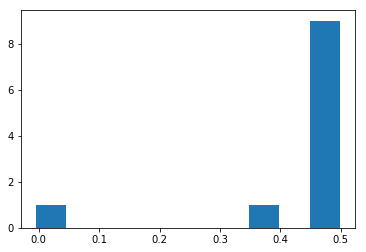

In [35]:
corrs = [
    [0, 6, 26, 30, 70, 135, 138, 193, 208, 183, 51, 120],
    [1, 2, 7, 118, 200, 216, 117, 46, 94, 218, 167, 199],
    [17, 18, 27, 59, 72, 79, 108, 114, 168, 171, 179, 184],
    [35, 76, 58, 104, 87, 102, 107, 128, 144, 155, 190, 218],
    [77, 84, 127, 131, 146, 148, 154, 47, 49, 209, 212, 33],
    [81, 185, 215, 89, 188, 213, 101, 130,22, 112, 71, 191]
]

In [32]:
stds[0]

TypeError: 'map' object is not subscriptable

In [60]:
corr_11 = []
for i, c in enumerate(corr[193]):
    if c > 0.8:
        corr_11.append([i, c])
corr_11

[[0, 0.95950764432849778],
 [6, 0.96878110312022525],
 [23, 0.90220278746466964],
 [26, 0.97121233680079666],
 [30, 0.96872990723192165],
 [51, 0.94207668181458459],
 [54, 0.87059227725002275],
 [61, 0.90272376245767105],
 [62, 0.82266269875429865],
 [70, 0.95798959732559219],
 [120, 0.87959338266663256],
 [135, 0.96012129966122228],
 [138, 0.9804001267027328],
 [157, 0.92690657640604268],
 [158, 0.84477341655245253],
 [183, 0.95882879138341448],
 [193, 1.0],
 [198, 0.87521970751099454],
 [208, 0.9726093577979773],
 [214, 0.81337772315632817]]